# Univariate Modelling

In [1]:
import os
import joblib
import pandas as pd

stored_models = [file for file in os.listdir() if file.endswith('.model.pkl')]
stored_models

['XGBRegressor.model.pkl',
 'BaggingRegressor.model.pkl',
 'ExtraTreeRegressor.model.pkl']

In [2]:
from sklearn.ensemble import VotingRegressor

estimators = []
for model_file in stored_models:
    print(f'Loading {model_file}')
    model = joblib.load(model_file)
    estimators.append((
        model_file.replace('.model.pkl', ''),
        model
    ))

estimators

Loading XGBRegressor.model.pkl
Loading BaggingRegressor.model.pkl
Loading ExtraTreeRegressor.model.pkl


[('XGBRegressor',
  XGBRegressor(alpha=0.9274497211646519, base_score=None, booster=None,
               callbacks=None, colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7498174276996894, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=8.268048167007025,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda=0.06777249605956756,
               learning_rate=0.01974842035904076, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=531, n_jobs=None, ...)),
 ('BaggingRegressor',
  BaggingRegressor(estimator=DecisionTreeRegressor(),
                   max_features=0.990383785781453, max_samples=0.509859688

In [3]:
# Load, preprocess and standardize the train data 
from pipelines import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

ensemble = VotingRegressor(estimators=estimators, verbose=True)
ensemble.fit(X=X_train, y=y_train)
ensemble.score(X=X_train, y=y_train)

[Voting] ............. (1 of 3) Processing XGBRegressor, total=   2.3s
[Voting] ......... (2 of 3) Processing BaggingRegressor, total= 3.4min
[Voting] ....... (3 of 3) Processing ExtraTreeRegressor, total=   0.2s


0.6927190805186967

# Prepare test results

In [4]:
test_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')

In [5]:
## Load the test data
test_data = pd.read_csv(test_file, index_col=0)
test_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from pipelines import pipeline

test_data = pipeline.fit_transform(test_data)
test_data.head()

,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,...,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,1.491642,1.324146,1.148222,0.953140,0.760652,0.566115,0.478713,0.393620,0.310098,0.225818,...,-0.367043,-0.373875,-0.378490,-0.371655,-0.345072,-0.166561,0,1,0,0
p01_8460,-1.477260,-1.418850,-1.355851,-1.289736,-1.095439,-0.899998,-0.701944,-0.713113,-0.719509,-0.726487,...,1.261618,1.337425,2.229206,3.197924,2.460736,3.490763,0,0,0,1
p01_8461,-1.169069,-0.996057,-0.820000,-0.641565,-0.487053,-0.332137,-0.177207,-0.157173,-0.134096,-0.112097,...,0.698290,-0.081702,-0.132239,0.068468,1.774619,0.402079,0,0,0,0
p01_8462,-0.706784,-0.593889,-0.479941,-0.363778,-0.332379,-0.301163,-0.269808,-0.198353,-0.123826,-0.050658,...,-0.352781,-0.359482,-0.378490,-0.371655,-0.345072,-0.341314,0,0,1,0
p01_8463,-1.662174,-1.656026,-1.644386,-1.629254,-1.652266,-1.674354,-1.689683,-1.639680,-1.582223,-1.525194,...,-0.352781,-0.373875,-0.378490,-0.371655,-0.359337,-0.341314,0,0,1,0


In [7]:
# Predict the bg+1:00 values
test_data['bg+1:00'] = ensemble.predict(test_data)
test_data.head()

,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,1.491642,1.324146,1.148222,0.953140,0.760652,0.566115,0.478713,0.393620,0.310098,0.225818,...,-0.373875,-0.378490,-0.371655,-0.345072,-0.166561,0,1,0,0,9.063709
p01_8460,-1.477260,-1.418850,-1.355851,-1.289736,-1.095439,-0.899998,-0.701944,-0.713113,-0.719509,-0.726487,...,1.337425,2.229206,3.197924,2.460736,3.490763,0,0,0,1,6.112231
p01_8461,-1.169069,-0.996057,-0.820000,-0.641565,-0.487053,-0.332137,-0.177207,-0.157173,-0.134096,-0.112097,...,-0.081702,-0.132239,0.068468,1.774619,0.402079,0,0,0,0,7.246492
p01_8462,-0.706784,-0.593889,-0.479941,-0.363778,-0.332379,-0.301163,-0.269808,-0.198353,-0.123826,-0.050658,...,-0.359482,-0.378490,-0.371655,-0.345072,-0.341314,0,0,1,0,9.360159
p01_8463,-1.662174,-1.656026,-1.644386,-1.629254,-1.652266,-1.674354,-1.689683,-1.639680,-1.582223,-1.525194,...,-0.373875,-0.378490,-0.371655,-0.359337,-0.341314,0,0,1,0,6.166652


## Prepare the submission file

In [8]:
submission = pd.DataFrame(test_data['bg+1:00'])
submission

,bg+1:00
id,
p01_8459,9.063709
p01_8460,6.112231
p01_8461,7.246492
p01_8462,9.360159
p01_8463,6.166652
...,...
p24_256,6.239039
p24_257,9.816464
p24_258,6.736961


### Save the submission file

In [9]:
submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')

## Evaluate the model

RMSE: 1.6609865604397245
R2: 0.6927190805186967


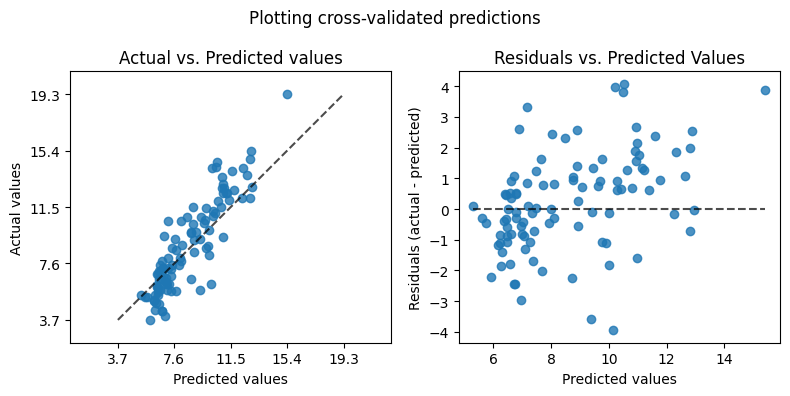

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_pred = ensemble.predict(X=X_train)
print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();